In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

### classification : consommation du carburant

In [2]:
# Load the data
data = pd.read_csv('aircraft_consommations_data.csv')

In [4]:
data['consommation_carburant'][0]

0.6647932731244572

In [5]:
# Group the data by aircraft type and aggregate the CO2 emissions as a list

grouped = data.groupby('type_avion')['consommation_carburant'].apply(list)
print(grouped)

max_len = max([len(x) for x in grouped])
# Create a list of arrays of CO2 emissions, with padding to the maximum length
co2_list = [np.pad(np.array(x), (0, max_len - len(x)), 'constant', constant_values=np.mean(x)) for x in grouped]

# Convert the list of arrays to a numpy array
co2_array = np.vstack(co2_list)

# Convert the aggregated CO2 emissions to a numpy array
#co2_array = np.array(grouped.tolist())

# Normalize the data
normalized = (co2_array - co2_array.mean()) / co2_array.std()

# Set the number of clusters
k = 3

# Fit the K-Means clustering model
model = KMeans(n_clusters=k)
model.fit(normalized)

# Get the predicted clusters for each aircraft type
clusters = model.predict(normalized)

# Add the cluster assignments to the original dataframe
data['cluster'] = data['type_avion'].apply(lambda x: clusters[grouped.index.get_loc(x)])

# Print the results
print(data)

type_avion
A319    [1.4323990683240138, 0.8638597753883579, 1.094...
A320    [0.5482482456046812, 1.362068630410171, 0.8711...
A321    [0.745348281998365, 0.8483654366339429, 0.9539...
B737                                 [0.7680627325730703]
B738    [0.6647932731244572, 0.6550034953671092, 1.079...
E190             [0.6020149232184497, 0.5714090139705748]
Name: consommation_carburant, dtype: object
    Unnamed: 0 type_avion  consommation_carburant  cluster
0            0       B738                0.664793        0
1            4       A319                1.432399        1
2            5       A320                0.548248        2
3            7       A321                0.745348        0
4            8       A321                0.848365        0
5            9       A321                0.953959        0
6           10       A319                0.863860        1
7           14       A321                0.927312        0
8           21       A320                1.362069        2
9      

c:\Users\chell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


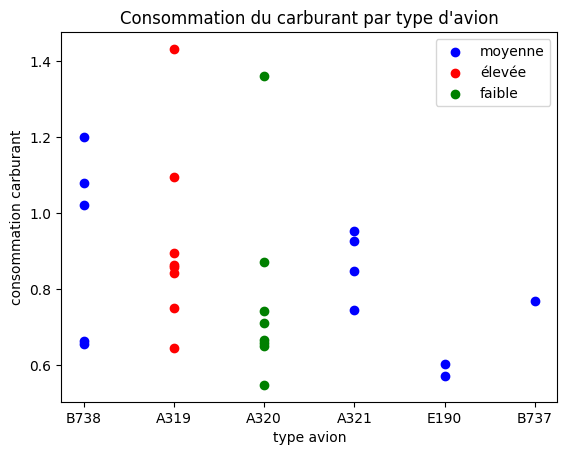

In [15]:
# Define a list of colors for each cluster
colors = ['b','r','g']
label = ["moyenne","élevée","faible"]
list = []

for i, row in data.iterrows():
    label_i = label[data['cluster'][i]]
    if list.__contains__(label_i) : 
        plt.scatter(row['type_avion'], row['consommation_carburant'], c = colors[data['cluster'][i]])
    else :
        list.append(label_i)
        plt.scatter(row['type_avion'], row['consommation_carburant'], c = colors[data['cluster'][i]], label = label[data['cluster'][i]])

plt.xlabel('type avion')
plt.ylabel('consommation carburant')
plt.title("Consommation du carburant par type d'avion")
plt.legend()
plt.show()